In [54]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn import decomposition

In [55]:
df = pd.read_excel("D:\\PytnonProject\\mix.ver2\\data.xlsx")
df = df.drop(['Unnamed: 0', 'Скорость смесителя, об/мин', 'Загрузка смесителя, кг'], axis=1)

In [56]:
'''Нормализация'''

'Нормализация'

In [57]:
scaler = MinMaxScaler()

In [58]:
df

,М.ч. оксида цинка,М.ч. стеариновой кислоты,М.ч. бентонита,М.ч. жирных кислот,"Температура смешения, оС","М300, Мпа","Fразрыв, МПа","Е, %"
0,1.16,0.96,1.64,0.24,65,11.600000,22.900000,557.000000
1,1.20,1.80,2.00,0.00,120,16.100000,23.300000,413.000000
2,1.16,0.96,1.64,0.24,120,12.900000,21.300000,457.000000
3,1.18,1.18,1.65,0.00,120,12.400000,21.500000,500.000000
4,1.18,1.18,1.65,0.00,65,11.800000,22.000000,483.000000
...,...,...,...,...,...,...,...,...
494,0.99,1.72,1.29,0.00,110,10.160000,21.400000,531.670000
495,1.32,1.00,1.68,0.00,110,14.242894,23.322207,446.666667
496,1.32,1.00,1.68,0.00,110,12.281242,22.683855,463.333333
497,1.32,1.00,1.68,0.00,110,13.148111,22.211282,443.333333


In [59]:
scale_df = pd.DataFrame()
scale_df[['М.ч. оксида цинка', 'М.ч. стеариновой кислоты', 'М.ч. бентонита', 'М.ч. жирных кислот', 'Температура смешения, оС', 'М300, Мпа', 'Fразрыв, МПа', 'Е, %']] = scaler.fit_transform(df)
scale_df

,М.ч. оксида цинка,М.ч. стеариновой кислоты,М.ч. бентонита,М.ч. жирных кислот,"Температура смешения, оС","М300, Мпа","Fразрыв, МПа","Е, %"
0,0.129771,0.240000,0.480,0.171429,0.000000,0.385321,0.666667,0.672000
1,0.160305,0.800000,0.624,0.000000,1.000000,0.798165,0.709677,0.288000
2,0.129771,0.240000,0.480,0.171429,1.000000,0.504587,0.494624,0.405333
3,0.145038,0.386667,0.484,0.000000,1.000000,0.458716,0.516129,0.520000
4,0.145038,0.386667,0.484,0.000000,0.000000,0.403670,0.569892,0.474667
...,...,...,...,...,...,...,...,...
494,0.000000,0.746667,0.340,0.000000,0.818182,0.253211,0.505376,0.604453
495,0.251908,0.266667,0.496,0.000000,0.818182,0.627788,0.712065,0.377778
496,0.251908,0.266667,0.496,0.000000,0.818182,0.447820,0.643425,0.422222
497,0.251908,0.266667,0.496,0.000000,0.818182,0.527350,0.592611,0.368889


In [60]:
'''Линейная модель без PCA'''

'Линейная модель без PCA'

In [61]:
X = torch.Tensor(scale_df[['М.ч. оксида цинка', 'М.ч. стеариновой кислоты', 'М.ч. бентонита', 'М.ч. жирных кислот', 'Температура смешения, оС']].values)
Y = torch.Tensor(scale_df[['М300, Мпа', 'Fразрыв, МПа', 'Е, %']].values)

In [62]:
n_samples, n_features = X.shape

In [63]:
input_size = n_features
output_size = 3

model = nn.Linear(input_size, output_size)

In [64]:
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [65]:
num_epochs = 100

for epoch in range(num_epochs):
    Y_predicted = model(X)
    loss = criterion(Y_predicted, Y)

    loss.backward()

    optimizer.step()

    optimizer.zero_grad()

    if(epoch + 1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

print(Y_predicted.shape)

epoch: 10, loss = 0.2553
epoch: 20, loss = 0.1033
epoch: 30, loss = 0.0481
epoch: 40, loss = 0.0306
epoch: 50, loss = 0.0271
epoch: 60, loss = 0.0264
epoch: 70, loss = 0.0259
epoch: 80, loss = 0.0252
epoch: 90, loss = 0.0247
epoch: 100, loss = 0.0244
torch.Size([499, 3])


In [66]:
predicted = model(X).detach()

In [67]:
predicted_df = pd.DataFrame(predicted)
predicted_df.columns = ['М300, Мпа', 'Fразрыв, МПа', 'Е, %']
predicted_df

,"М300, Мпа","Fразрыв, МПа","Е, %"
0,0.382712,0.487927,0.514915
1,0.502267,0.622533,0.655681
2,0.444166,0.663788,0.484598
3,0.431303,0.568468,0.490064
4,0.369849,0.392607,0.520380
...,...,...,...
494,0.433146,0.583455,0.532151
495,0.401118,0.514766,0.505531
496,0.401118,0.514766,0.505531
497,0.401118,0.514766,0.505531


In [68]:
input_df = pd.DataFrame(X)
input_df.columns = ['М.ч. оксида цинка', 'М.ч. стеариновой кислоты', 'М.ч. бентонита', 'М.ч. жирных кислот', 'Температура смешения, оС']

result = pd.concat([input_df, predicted_df], axis=1)
result = scaler.inverse_transform(result)
result = pd.DataFrame(result)
result.columns = ['М.ч. оксида цинка', 'М.ч. стеариновой кислоты', 'М.ч. бентонита', 'М.ч. жирных кислот', 'Температура смешения, оС', 'М300, Мпа', 'Fразрыв, МПа', 'Е, %']
result

,М.ч. оксида цинка,М.ч. стеариновой кислоты,М.ч. бентонита,М.ч. жирных кислот,"Температура смешения, оС","М300, Мпа","Fразрыв, МПа","Е, %"
0,1.16,0.96,1.64,0.24,65.0,11.571562,21.237724,498.093018
1,1.20,1.80,2.00,0.00,120.0,12.874707,22.489561,550.880249
2,1.16,0.96,1.64,0.24,120.0,12.241414,22.873232,486.724274
3,1.18,1.18,1.65,0.00,120.0,12.101207,21.986755,488.773895
4,1.18,1.18,1.65,0.00,65.0,11.431355,20.351246,500.142609
...,...,...,...,...,...,...,...,...
494,0.99,1.72,1.29,0.00,110.0,12.121295,22.126129,504.556458
495,1.32,1.00,1.68,0.00,110.0,11.772189,21.487318,494.573944
496,1.32,1.00,1.68,0.00,110.0,11.772189,21.487318,494.573944
497,1.32,1.00,1.68,0.00,110.0,11.772189,21.487318,494.573944


In [69]:
df['М300, Мпа'].mean()

11.963922411861118

In [70]:
result

,М.ч. оксида цинка,М.ч. стеариновой кислоты,М.ч. бентонита,М.ч. жирных кислот,"Температура смешения, оС","М300, Мпа","Fразрыв, МПа","Е, %"
0,1.16,0.96,1.64,0.24,65.0,11.571562,21.237724,498.093018
1,1.20,1.80,2.00,0.00,120.0,12.874707,22.489561,550.880249
2,1.16,0.96,1.64,0.24,120.0,12.241414,22.873232,486.724274
3,1.18,1.18,1.65,0.00,120.0,12.101207,21.986755,488.773895
4,1.18,1.18,1.65,0.00,65.0,11.431355,20.351246,500.142609
...,...,...,...,...,...,...,...,...
494,0.99,1.72,1.29,0.00,110.0,12.121295,22.126129,504.556458
495,1.32,1.00,1.68,0.00,110.0,11.772189,21.487318,494.573944
496,1.32,1.00,1.68,0.00,110.0,11.772189,21.487318,494.573944
497,1.32,1.00,1.68,0.00,110.0,11.772189,21.487318,494.573944


In [71]:
plt.rcParams ['figure.figsize'] = [12, 9]

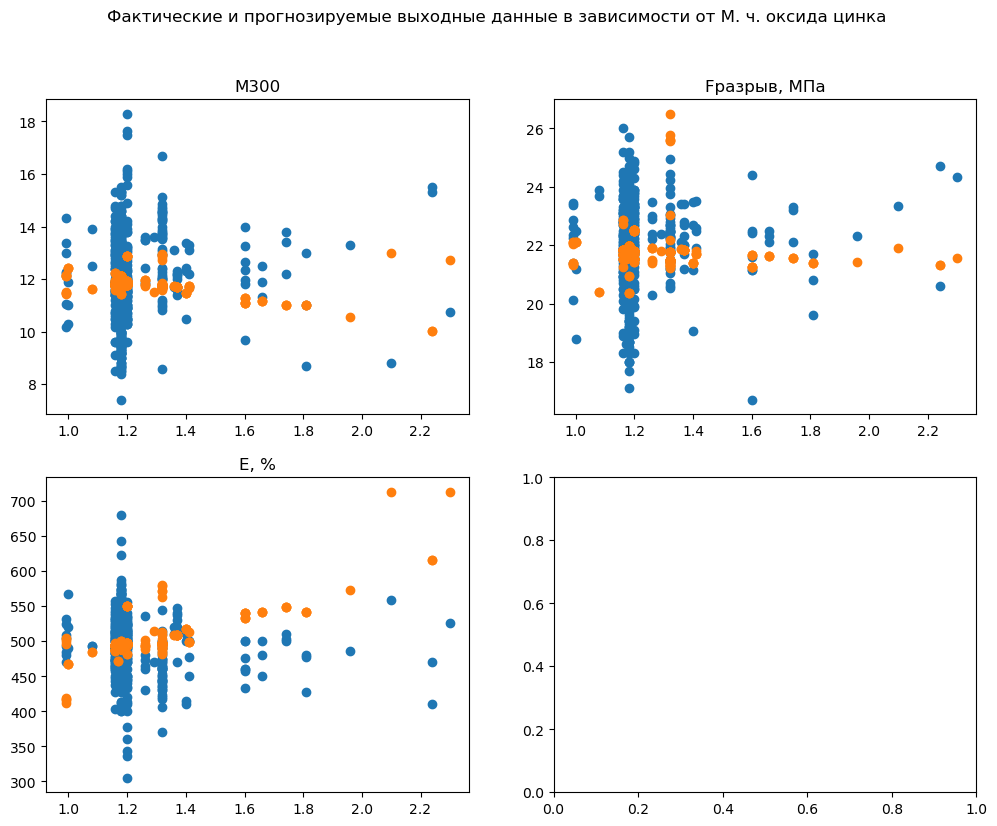

In [72]:
fig, axs = plt.subplots(2, 2)
plt.suptitle('Фактические и прогнозируемые выходные данные в зависимости от М. ч. оксида цинка')
axs[0, 0].set_title('М300')
axs[0, 0].scatter(result['М.ч. оксида цинка'], df['М300, Мпа'])
axs[0, 0].scatter(result['М.ч. оксида цинка'], result['М300, Мпа'])
axs[0, 1].set_title('Fразрыв, МПa')
axs[0, 1].scatter(result['М.ч. оксида цинка'], df['Fразрыв, МПа'])
axs[0, 1].scatter(result['М.ч. оксида цинка'], result['Fразрыв, МПа'])
axs[1, 0].set_title('Е, %')
axs[1, 0].scatter(result['М.ч. оксида цинка'], df['Е, %'])
axs[1, 0].scatter(result['М.ч. оксида цинка'], result['Е, %'])
fig.savefig('figure1.png')

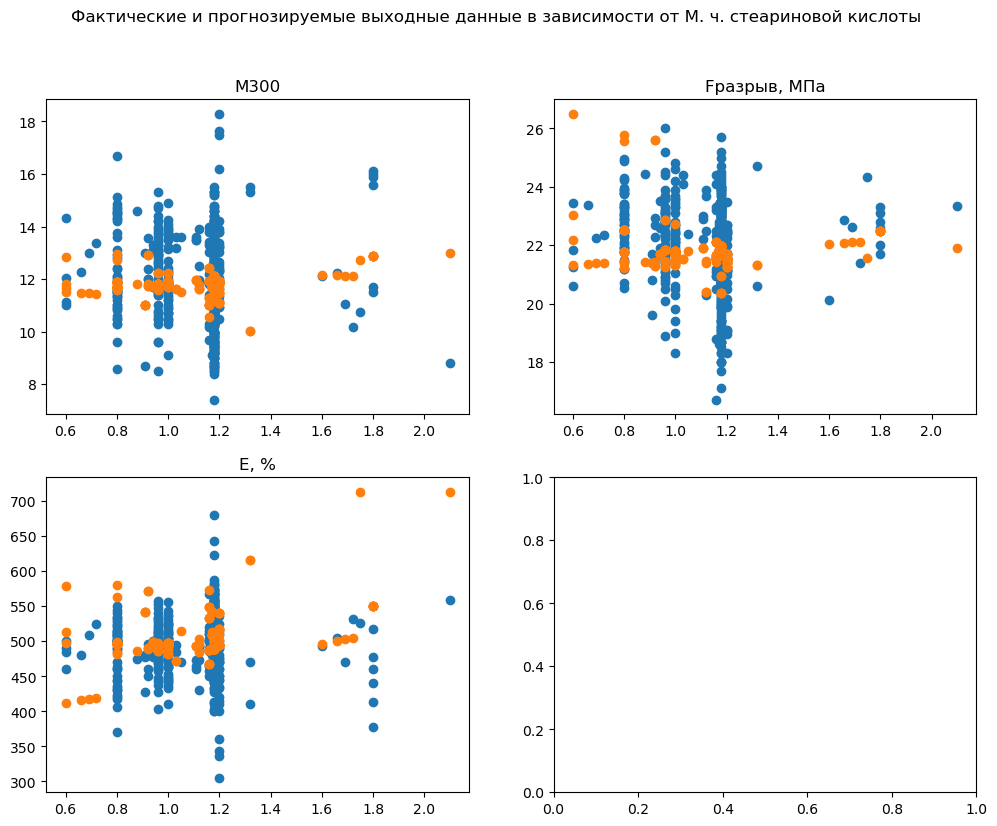

In [73]:
fig, axs = plt.subplots(2, 2)
plt.suptitle('Фактические и прогнозируемые выходные данные в зависимости от М. ч. стеариновой кислоты')
axs[0, 0].set_title('М300')
axs[0, 0].scatter(result['М.ч. стеариновой кислоты'], df['М300, Мпа'])
axs[0, 0].scatter(result['М.ч. стеариновой кислоты'], result['М300, Мпа'])
axs[0, 1].set_title('Fразрыв, МПa')
axs[0, 1].scatter(result['М.ч. стеариновой кислоты'], df['Fразрыв, МПа'])
axs[0, 1].scatter(result['М.ч. стеариновой кислоты'], result['Fразрыв, МПа'])
axs[1, 0].set_title('Е, %')
axs[1, 0].scatter(result['М.ч. стеариновой кислоты'], df['Е, %'])
axs[1, 0].scatter(result['М.ч. стеариновой кислоты'], result['Е, %'])
fig.savefig('figure2.png')

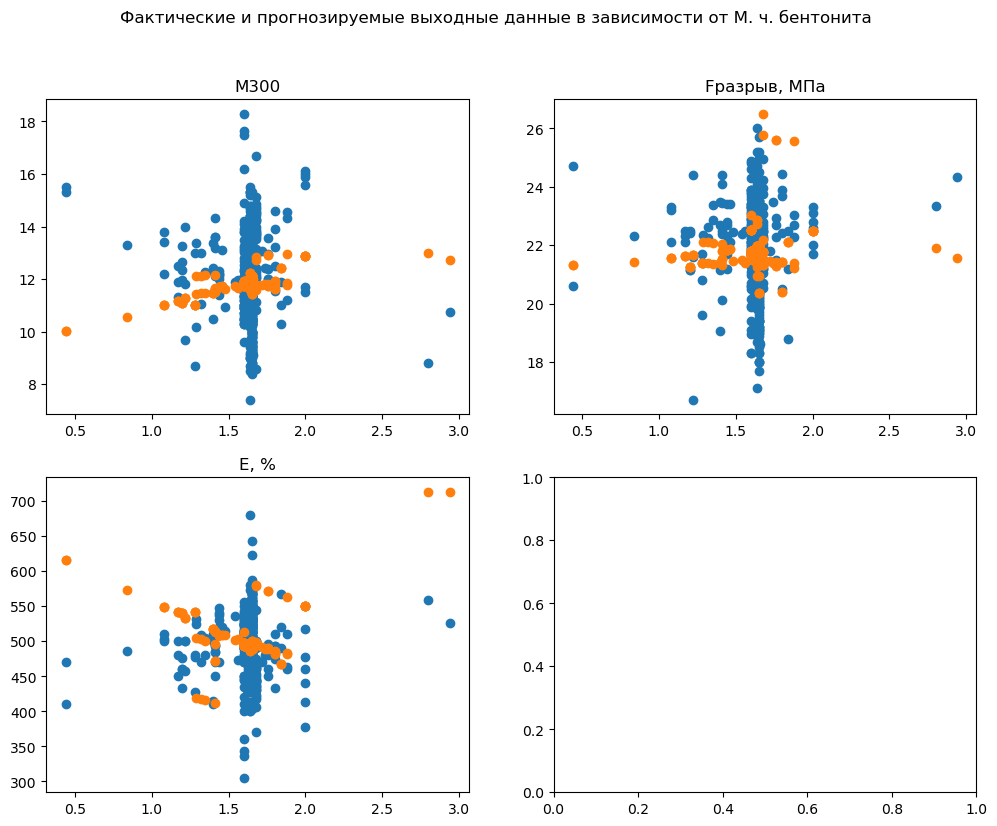

In [74]:
fig.savefig('figure2.png')
fig, axs = plt.subplots(2, 2)
plt.suptitle('Фактические и прогнозируемые выходные данные в зависимости от М. ч. бентонита')
axs[0, 0].set_title('М300')
axs[0, 0].scatter(result['М.ч. бентонита'], df['М300, Мпа'])
axs[0, 0].scatter(result['М.ч. бентонита'], result['М300, Мпа'])
axs[0, 1].set_title('Fразрыв, МПa')
axs[0, 1].scatter(result['М.ч. бентонита'], df['Fразрыв, МПа'])
axs[0, 1].scatter(result['М.ч. бентонита'], result['Fразрыв, МПа'])
axs[1, 0].set_title('Е, %')
axs[1, 0].scatter(result['М.ч. бентонита'], df['Е, %'])
axs[1, 0].scatter(result['М.ч. бентонита'], result['Е, %'])
fig.savefig('figure3.png')

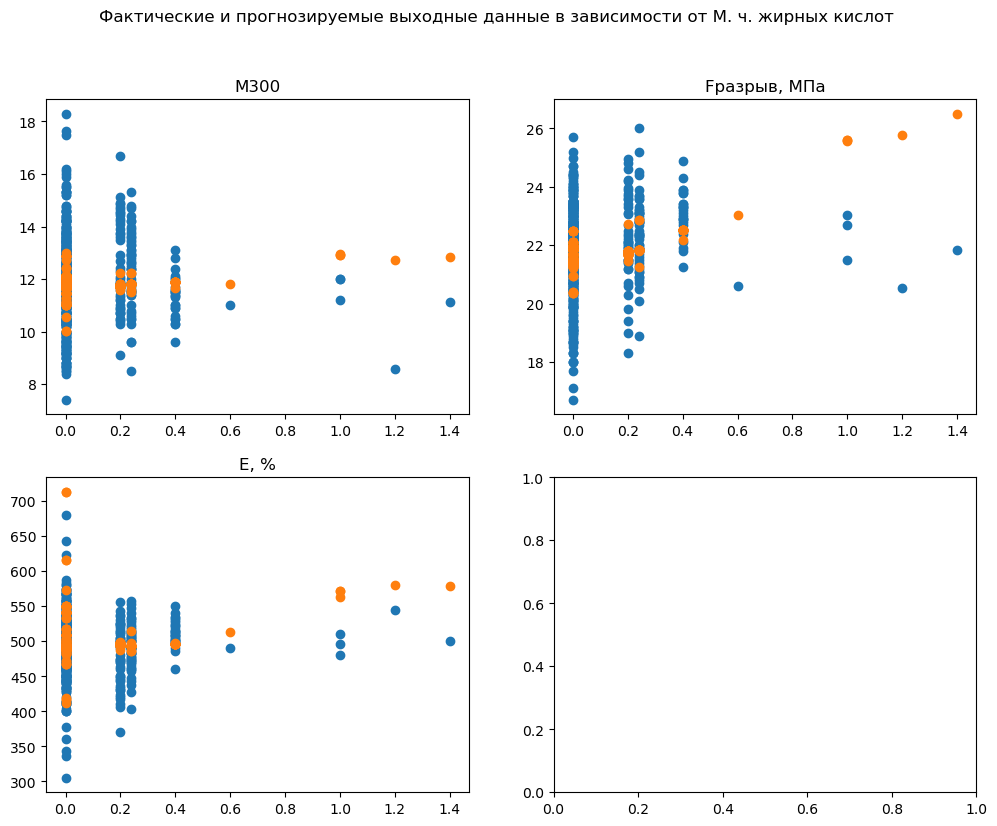

In [75]:
fig, axs = plt.subplots(2, 2)
plt.suptitle('Фактические и прогнозируемые выходные данные в зависимости от М. ч. жирных кислот')
axs[0, 0].set_title('М300')
axs[0, 0].scatter(result['М.ч. жирных кислот'], df['М300, Мпа'])
axs[0, 0].scatter(result['М.ч. жирных кислот'], result['М300, Мпа'])
axs[0, 1].set_title('Fразрыв, МПa')
axs[0, 1].scatter(result['М.ч. жирных кислот'], df['Fразрыв, МПа'])
axs[0, 1].scatter(result['М.ч. жирных кислот'], result['Fразрыв, МПа'])
axs[1, 0].set_title('Е, %')
axs[1, 0].scatter(result['М.ч. жирных кислот'], df['Е, %'])
axs[1, 0].scatter(result['М.ч. жирных кислот'], result['Е, %'])
fig.savefig('figure4.png')

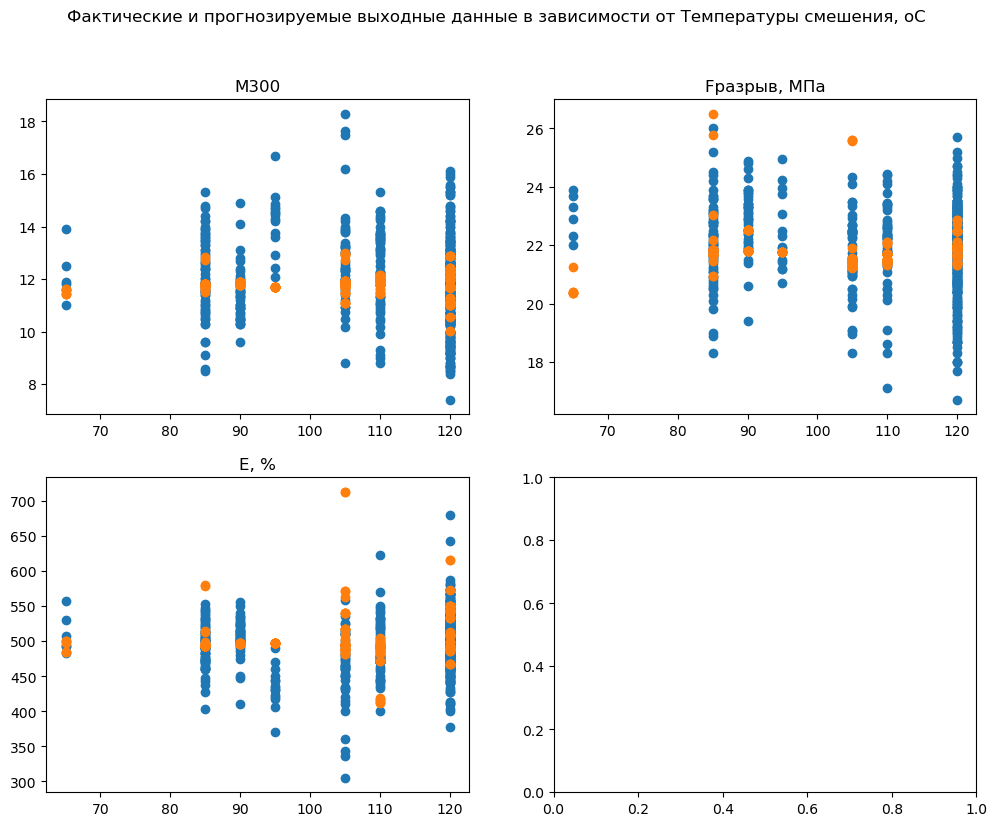

In [76]:
fig, axs = plt.subplots(2, 2)
plt.suptitle('Фактические и прогнозируемые выходные данные в зависимости от Температуры смешения, оС')
axs[0, 0].set_title('М300')
axs[0, 0].scatter(result['Температура смешения, оС'], df['М300, Мпа'])
axs[0, 0].scatter(result['Температура смешения, оС'], result['М300, Мпа'])
axs[0, 1].set_title('Fразрыв, МПa')
axs[0, 1].scatter(result['Температура смешения, оС'], df['Fразрыв, МПа'])
axs[0, 1].scatter(result['Температура смешения, оС'], result['Fразрыв, МПа'])
axs[1, 0].set_title('Е, %')
axs[1, 0].scatter(result['Температура смешения, оС'], df['Е, %'])
axs[1, 0].scatter(result['Температура смешения, оС'], result['Е, %'])
fig.savefig('figure5.png')

In [77]:
'''Линейная модель с PCA'''

'Линейная модель с PCA'

In [78]:
scale_df

,М.ч. оксида цинка,М.ч. стеариновой кислоты,М.ч. бентонита,М.ч. жирных кислот,"Температура смешения, оС","М300, Мпа","Fразрыв, МПа","Е, %"
0,0.129771,0.240000,0.480,0.171429,0.000000,0.385321,0.666667,0.672000
1,0.160305,0.800000,0.624,0.000000,1.000000,0.798165,0.709677,0.288000
2,0.129771,0.240000,0.480,0.171429,1.000000,0.504587,0.494624,0.405333
3,0.145038,0.386667,0.484,0.000000,1.000000,0.458716,0.516129,0.520000
4,0.145038,0.386667,0.484,0.000000,0.000000,0.403670,0.569892,0.474667
...,...,...,...,...,...,...,...,...
494,0.000000,0.746667,0.340,0.000000,0.818182,0.253211,0.505376,0.604453
495,0.251908,0.266667,0.496,0.000000,0.818182,0.627788,0.712065,0.377778
496,0.251908,0.266667,0.496,0.000000,0.818182,0.447820,0.643425,0.422222
497,0.251908,0.266667,0.496,0.000000,0.818182,0.527350,0.592611,0.368889


In [79]:
df_x_scale = scale_df[['М.ч. оксида цинка', 'М.ч. стеариновой кислоты', 'М.ч. бентонита', 'М.ч. жирных кислот', 'Температура смешения, оС']]

pca_x = df_x_scale[['М.ч. оксида цинка', 'М.ч. стеариновой кислоты']]
pca_x

,М.ч. оксида цинка,М.ч. стеариновой кислоты
0,0.129771,0.240000
1,0.160305,0.800000
2,0.129771,0.240000
3,0.145038,0.386667
4,0.145038,0.386667
...,...,...
494,0.000000,0.746667
495,0.251908,0.266667
496,0.251908,0.266667
497,0.251908,0.266667


In [80]:
pca = decomposition.PCA(n_components=1)
pca.fit(pca_x)
df_x_pca = pca.transform(pca_x)
df_x_pca = pd.DataFrame(df_x_pca)
df_x_pca = pd.concat([df_x_pca, df_x_scale[['М.ч. бентонита', 'М.ч. жирных кислот', 'Температура смешения, оС']]], axis=1)
df_x_pca.columns = ['X1', 'М.ч. бентонита', 'М.ч. жирных кислот', 'Температура смешения, оС']
df_x_pca

,X1,М.ч. бентонита,М.ч. жирных кислот,"Температура смешения, оС"
0,-0.109278,0.480,0.171429,0.000000
1,0.414851,0.624,0.000000,1.000000
2,-0.109278,0.480,0.171429,1.000000
3,0.030947,0.484,0.000000,1.000000
4,0.030947,0.484,0.000000,0.000000
...,...,...,...,...
494,0.301003,0.340,0.000000,0.818182
495,-0.035301,0.496,0.000000,0.818182
496,-0.035301,0.496,0.000000,0.818182
497,-0.035301,0.496,0.000000,0.818182


In [81]:
X = torch.Tensor(df_x_pca[['X1', 'М.ч. бентонита', 'М.ч. жирных кислот', 'Температура смешения, оС']].values)
Y = torch.Tensor(scale_df[['М300, Мпа', 'Fразрыв, МПа', 'Е, %']].values)

In [82]:
n_samples, n_features = X.shape

In [83]:
input_size = n_features
output_size = 3

model = nn.Linear(input_size, output_size)

In [84]:
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [85]:
num_epochs = 200

for epoch in range(num_epochs):
    Y_predicted = model(X)
    loss = criterion(Y_predicted, Y)

    loss.backward()

    optimizer.step()

    optimizer.zero_grad()

    if(epoch + 1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 0.5430
epoch: 20, loss = 0.2804
epoch: 30, loss = 0.1292
epoch: 40, loss = 0.0597
epoch: 50, loss = 0.0352
epoch: 60, loss = 0.0286
epoch: 70, loss = 0.0269
epoch: 80, loss = 0.0263
epoch: 90, loss = 0.0259
epoch: 100, loss = 0.0256
epoch: 110, loss = 0.0254
epoch: 120, loss = 0.0252
epoch: 130, loss = 0.0250
epoch: 140, loss = 0.0248
epoch: 150, loss = 0.0246
epoch: 160, loss = 0.0244
epoch: 170, loss = 0.0243
epoch: 180, loss = 0.0241
epoch: 190, loss = 0.0240
epoch: 200, loss = 0.0238


In [86]:
predicted = model(X).detach()

In [87]:
predicted_df = pd.DataFrame(predicted)
predicted_df.columns = ['М300, Мпа', 'Fразрыв, МПа', 'Е, %']
predicted_df

,"М300, Мпа","Fразрыв, МПа","Е, %"
0,0.217342,0.575949,0.463287
1,0.390776,0.613845,0.559509
2,0.533286,0.629268,0.547397
3,0.458326,0.550769,0.518511
4,0.142382,0.497449,0.434401
...,...,...,...
494,0.259250,0.555721,0.461104
495,0.426572,0.534622,0.506724
496,0.426572,0.534622,0.506724
497,0.426572,0.534622,0.506724


In [88]:
input_df = pd.DataFrame(df_x_scale)
input_df.columns = ['М.ч. оксида цинка', 'М.ч. стеариновой кислоты', 'М.ч. бентонита', 'М.ч. жирных кислот', 'Температура смешения, оС']

result = pd.concat([input_df, predicted_df], axis=1)
result = scaler.inverse_transform(result)
result = pd.DataFrame(result)
result.columns = ['М.ч. оксида цинка', 'М.ч. стеариновой кислоты', 'М.ч. бентонита', 'М.ч. жирных кислот', 'Температура смешения, оС', 'М300, Мпа', 'Fразрыв, МПа', 'Е, %']
result

,М.ч. оксида цинка,М.ч. стеариновой кислоты,М.ч. бентонита,М.ч. жирных кислот,"Температура смешения, оС","М300, Мпа","Fразрыв, МПа","Е, %"
0,1.16,0.96,1.64,0.24,65.0,9.769028,22.056324,478.732467
1,1.20,1.80,2.00,0.00,120.0,11.659455,22.408759,514.816046
2,1.16,0.96,1.64,0.24,120.0,13.212816,22.552196,510.273703
3,1.18,1.18,1.65,0.00,120.0,12.395750,21.822152,499.441512
4,1.18,1.18,1.65,0.00,65.0,8.951962,21.326279,467.900276
...,...,...,...,...,...,...,...,...
494,0.99,1.72,1.29,0.00,110.0,10.225830,21.868202,477.913902
495,1.32,1.00,1.68,0.00,110.0,12.049637,21.671989,495.021455
496,1.32,1.00,1.68,0.00,110.0,12.049637,21.671989,495.021455
497,1.32,1.00,1.68,0.00,110.0,12.049637,21.671989,495.021455


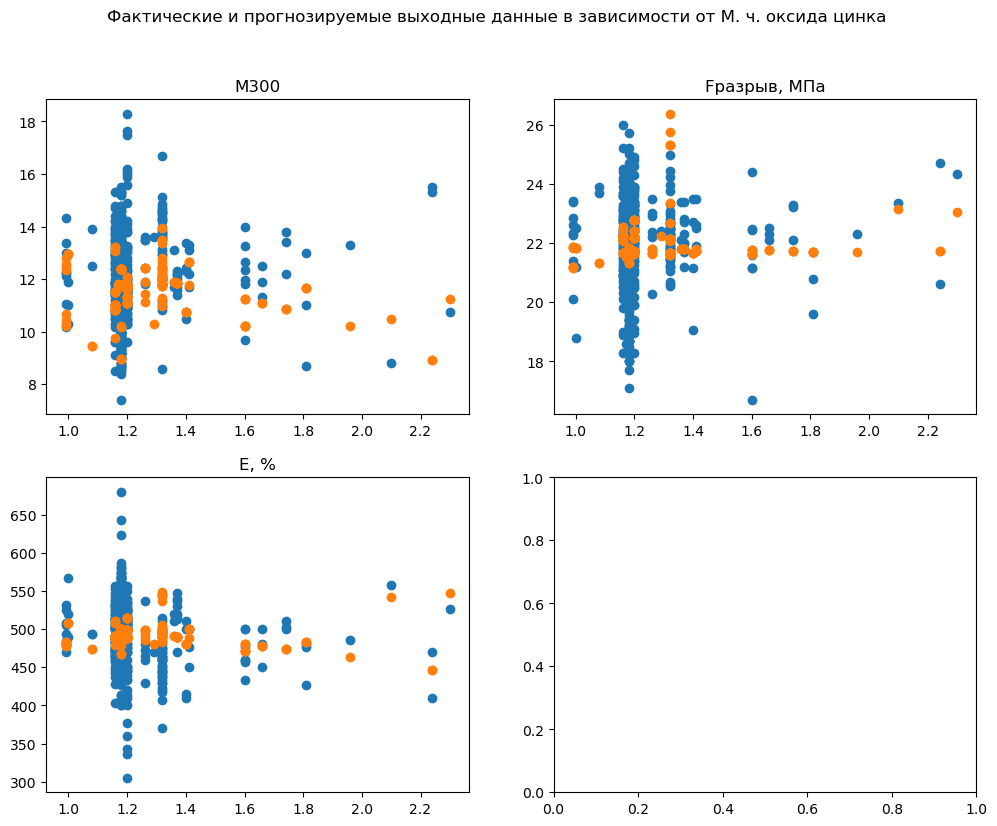

In [89]:
fig, axs = plt.subplots(2, 2)
plt.suptitle('Фактические и прогнозируемые выходные данные в зависимости от М. ч. оксида цинка')
axs[0, 0].set_title('М300')
axs[0, 0].scatter(result['М.ч. оксида цинка'], df['М300, Мпа'])
axs[0, 0].scatter(result['М.ч. оксида цинка'], result['М300, Мпа'])
axs[0, 1].set_title('Fразрыв, МПa')
axs[0, 1].scatter(result['М.ч. оксида цинка'], df['Fразрыв, МПа'])
axs[0, 1].scatter(result['М.ч. оксида цинка'], result['Fразрыв, МПа'])
axs[1, 0].set_title('Е, %')
axs[1, 0].scatter(result['М.ч. оксида цинка'], df['Е, %'])
axs[1, 0].scatter(result['М.ч. оксида цинка'], result['Е, %'])
fig.savefig('figure6.png')

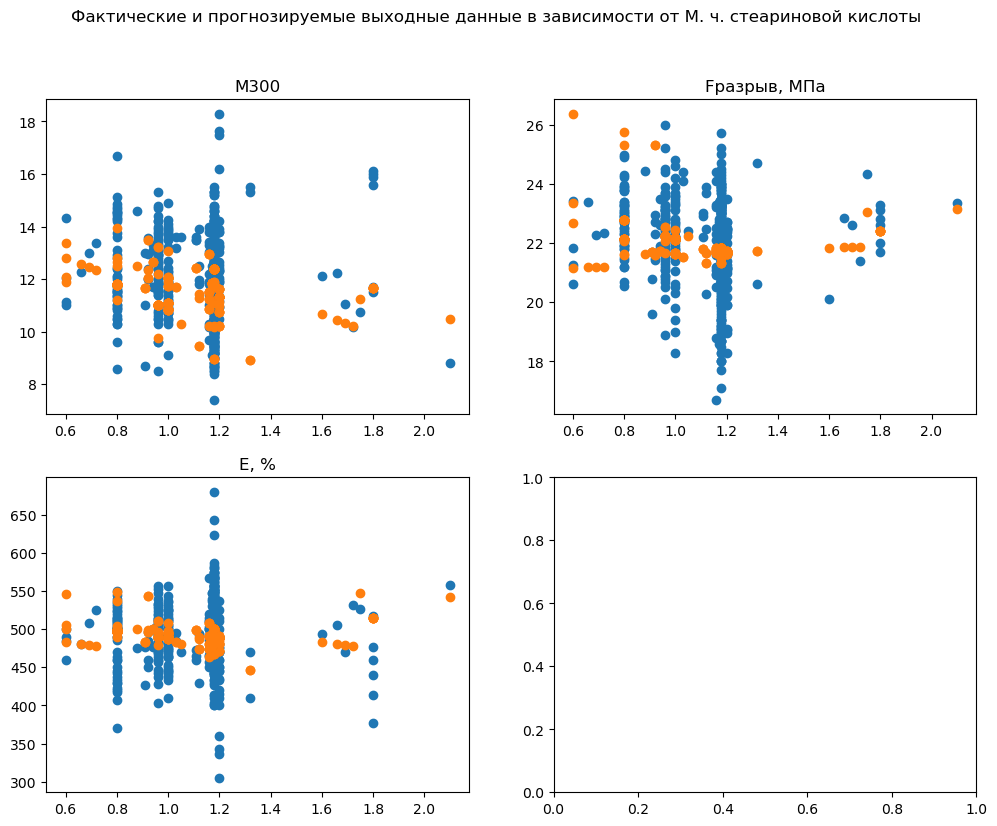

In [90]:
fig, axs = plt.subplots(2, 2)
plt.suptitle('Фактические и прогнозируемые выходные данные в зависимости от М. ч. стеариновой кислоты')
axs[0, 0].set_title('М300')
axs[0, 0].scatter(result['М.ч. стеариновой кислоты'], df['М300, Мпа'])
axs[0, 0].scatter(result['М.ч. стеариновой кислоты'], result['М300, Мпа'])
axs[0, 1].set_title('Fразрыв, МПa')
axs[0, 1].scatter(result['М.ч. стеариновой кислоты'], df['Fразрыв, МПа'])
axs[0, 1].scatter(result['М.ч. стеариновой кислоты'], result['Fразрыв, МПа'])
axs[1, 0].set_title('Е, %')
axs[1, 0].scatter(result['М.ч. стеариновой кислоты'], df['Е, %'])
axs[1, 0].scatter(result['М.ч. стеариновой кислоты'], result['Е, %'])
fig.savefig('figure7.png')

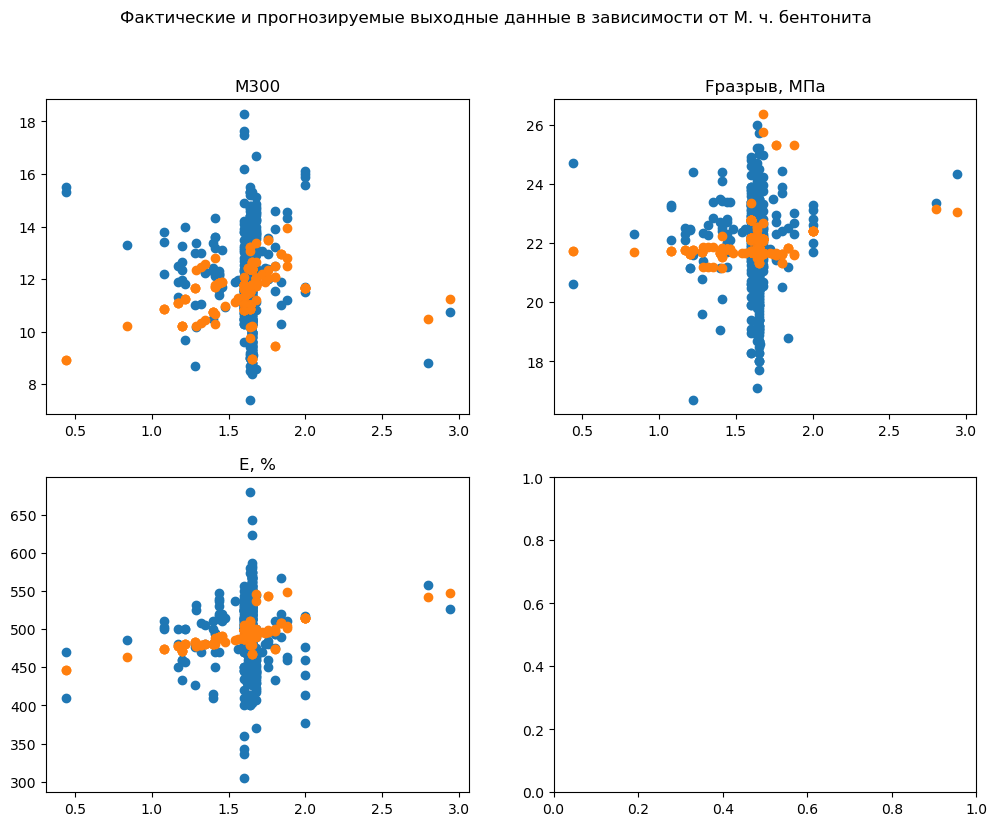

In [91]:
fig, axs = plt.subplots(2, 2)
plt.suptitle('Фактические и прогнозируемые выходные данные в зависимости от М. ч. бентонита')
axs[0, 0].set_title('М300')
axs[0, 0].scatter(result['М.ч. бентонита'], df['М300, Мпа'])
axs[0, 0].scatter(result['М.ч. бентонита'], result['М300, Мпа'])
axs[0, 1].set_title('Fразрыв, МПa')
axs[0, 1].scatter(result['М.ч. бентонита'], df['Fразрыв, МПа'])
axs[0, 1].scatter(result['М.ч. бентонита'], result['Fразрыв, МПа'])
axs[1, 0].set_title('Е, %')
axs[1, 0].scatter(result['М.ч. бентонита'], df['Е, %'])
axs[1, 0].scatter(result['М.ч. бентонита'], result['Е, %'])
fig.savefig('figure8.png')

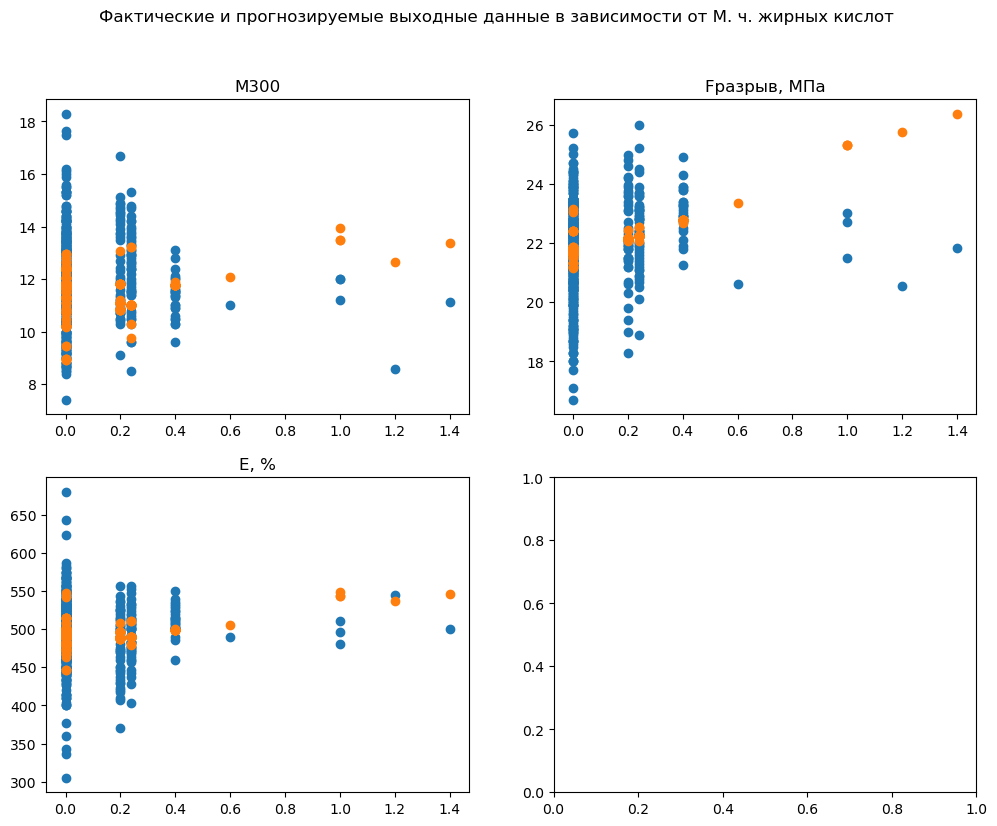

In [92]:
fig, axs = plt.subplots(2, 2)
plt.suptitle('Фактические и прогнозируемые выходные данные в зависимости от М. ч. жирных кислот')
axs[0, 0].set_title('М300')
axs[0, 0].scatter(result['М.ч. жирных кислот'], df['М300, Мпа'])
axs[0, 0].scatter(result['М.ч. жирных кислот'], result['М300, Мпа'])
axs[0, 1].set_title('Fразрыв, МПa')
axs[0, 1].scatter(result['М.ч. жирных кислот'], df['Fразрыв, МПа'])
axs[0, 1].scatter(result['М.ч. жирных кислот'], result['Fразрыв, МПа'])
axs[1, 0].set_title('Е, %')
axs[1, 0].scatter(result['М.ч. жирных кислот'], df['Е, %'])
axs[1, 0].scatter(result['М.ч. жирных кислот'], result['Е, %'])
fig.savefig('figure9.png')

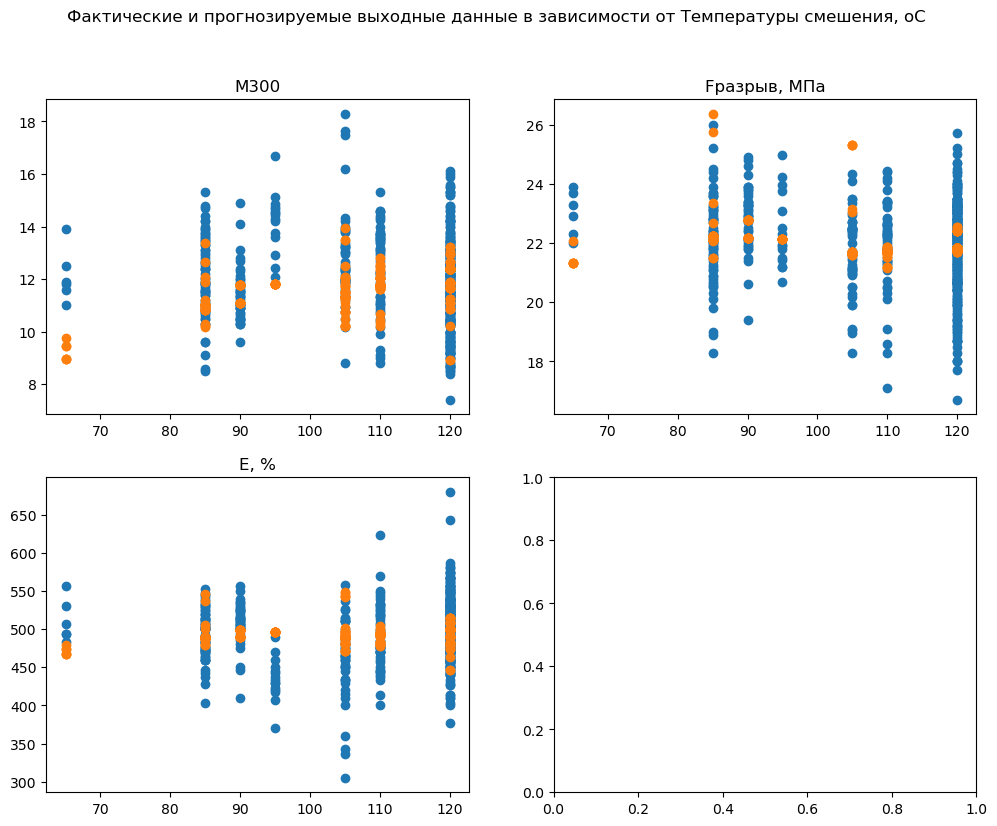

In [93]:
fig, axs = plt.subplots(2, 2)
plt.suptitle('Фактические и прогнозируемые выходные данные в зависимости от Температуры смешения, оС')
axs[0, 0].set_title('М300')
axs[0, 0].scatter(result['Температура смешения, оС'], df['М300, Мпа'])
axs[0, 0].scatter(result['Температура смешения, оС'], result['М300, Мпа'])
axs[0, 1].set_title('Fразрыв, МПa')
axs[0, 1].scatter(result['Температура смешения, оС'], df['Fразрыв, МПа'])
axs[0, 1].scatter(result['Температура смешения, оС'], result['Fразрыв, МПа'])
axs[1, 0].set_title('Е, %')
axs[1, 0].scatter(result['Температура смешения, оС'], df['Е, %'])
axs[1, 0].scatter(result['Температура смешения, оС'], result['Е, %'])
fig.savefig('figure10.png')